In [2]:
%pylab inline 
import numpy as np
import pandas as pd
import os, sys
import random
import networkx as nx
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Creation

In [3]:
class simplex_vertex:
    '''
    Vertex class for simplicial activity driven model
    '''
    import random
    def __init__(self,vertex_id,activity):
        self.act = activity;
        self.name = vertex_id;
        self.memory = [];
    
    def update_history(self,newcollab):
        self.memory.append(newcollab);
                
    def repeat_collaboration(self):
        s = random.choice(self.memory);
        self.memory.append(s)
        return s;

    def new_collab(self,nodes,size):
        el = random.sample(nodes,size);
        el.append(self.name);
        self.memory.append(el);
        return el;

def add_clique(e,tgraph):
    g = nx.complete_graph(len(e));
    rl = dict(zip(range(len(e)), e));
    g = nx.relabel_nodes(g,rl)
    tgraph.add_edges_from(g.edges());
    return tgraph;
        
def memory_instant_graph(vertex_dict):
    tgraph = nx.Graph()
    tgraph.add_nodes_from(vertex_dict.keys());
    new_history = []
    for n in vertex_dict:
        if np.random.rand()<=vertex_dict[n].act:
            if np.random.rand() <= (len(vertex_dict[n].memory) / float(1+len(vertex_dict[n].memory))):
                e = vertex_dict[n].repeat_collaboration();
                tgraph = add_clique(e,tgraph);                
            else:
                nodes = vertex_dict.keys();
                nodes.remove(n)
                e = vertex_dict[n].new_collab(nodes,np.random.randint(10));
            new_history.append(e);
            tgraph = add_clique(e,tgraph);
    return tgraph, new_history;

def memoryless_instant_graph(vertex_dict,k):
    tgraph = nx.Graph()
    tgraph.add_nodes_from(vertex_dict.keys());
    new_history = []
    for n in vertex_dict:
        if np.random.rand()<=vertex_dict[n].act:
            nodes = vertex_dict.keys();
            nodes.remove(n)
            e = vertex_dict[n].new_collab(nodes,k);
            new_history.append(e);
            tgraph = add_clique(e,tgraph);
    return tgraph, new_history;

def threshold_ratio(k, a1,a2):
    return 2.0 / (k*(k-1) * a1 + (k-1)*np.sqrt(k*k*a1*a1 + 4*(a2-a1*a1)));

def temporal_graph_creation(N,T,k,act,seed=1,verbose=False):
    tgraph = {}
    vertex_dict = {}
    for n in range(N):
        vertex_dict[n] = simplex_vertex(n,act[n])
    for t in range(T):
        if verbose == True and T%100==0:
            print T;
        tg, fh = memoryless_instant_graph(vertex_dict,k);
        tgraph[t] = tg
    return tgraph;

def temporal_graph_export(tgraph,filename):
    f = open(filename,'w');
    for t in tgraph:
        for edge in tgraph[t].edges():
            f.write('\t'.join(map(str,[t,edge[0],edge[1]]))+'\n')
    return;

0.525719906567 0.0207725738364


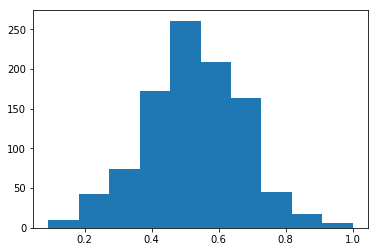

In [8]:
N = 1000
# produce activities 
from scipy.stats import norm,pareto
mu , var = 0.35, 0.10
dist = norm(loc=mu, scale=var).rvs(N)
dist = np.array(map(lambda x: np.max([0.001,x]), np.random.choice(dist,N)))
act = dict(zip(range(N),dist/np.max(dist)))
plt.hist(act.values())
mu, v  = np.mean(act.values()), np.var(act.values())
print mu, v

In [10]:
# predict thresholds
ks = range(2,6)
thrs = {}
for k in ks:
    thrs[k] = threshold_ratio(k,mu,v)
    print k, thrs[k]

max_lambda = 0.4;
[max_lambda / thrs[k] for k in thrs]

2 1.4928785741
3 0.358740470963
4 0.168917564596
5 0.0989132550707


[0.2679387372428122,
 1.1150121951003451,
 2.3680189858040959,
 4.0439473932411873]

In [11]:
import time
epi  = {}
T  = 1000;
N = 200;
kk=4
now = time.time()
epi = temporal_graph_creation(N,T,kk,act,seed=10)
print   'lambda, mu', max_lambda,max_lambda/thrs[4], 'time completed', 2, time.time() - now

lambda, mu 0.4 2.3680189858 time completed 2 28.4194169044


In [21]:
%%sh
mkdir ../data/simple-test/


In [86]:
temporal_graph_export(epi, '../data/simple-test2/test.pck')

# Analysis 

In [77]:
%%sh
ls ../data/simple-test2/avg*


../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.16,Q=30,res=1.txt
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.17,Q=30,res=1.txt
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.18,Q=30,res=1.txt
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.19,Q=30,res=1.txt
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.20,Q=30,res=1.txt
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.21,Q=30,res=1.txt
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.22,Q=30,res=1.txt
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.23,Q=30,res=1.txt
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.24,Q=30,res=1.txt
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.25,Q=30,res=1.txt
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.26,Q=30,res=1.txt
../data/simple-test2/

In [78]:
x = map(lambda x: format(x,'.2f'), np.linspace(0.16,0.55,40))
print x

['0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31', '0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.43', '0.44', '0.45', '0.46', '0.47', '0.48', '0.49', '0.50', '0.51', '0.52', '0.53', '0.54', '0.55']


0.16
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.16,Q=30,res=1.txt
0.17
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.17,Q=30,res=1.txt
0.18
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.18,Q=30,res=1.txt
0.19
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.19,Q=30,res=1.txt
0.20
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.20,Q=30,res=1.txt
0.21
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.21,Q=30,res=1.txt
0.22
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.22,Q=30,res=1.txt
0.23
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.23,Q=30,res=1.txt
0.24
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.24,Q=30,res=1.txt
0.25
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu=0.25,Q=30,res=1.txt
0.26
../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=1000

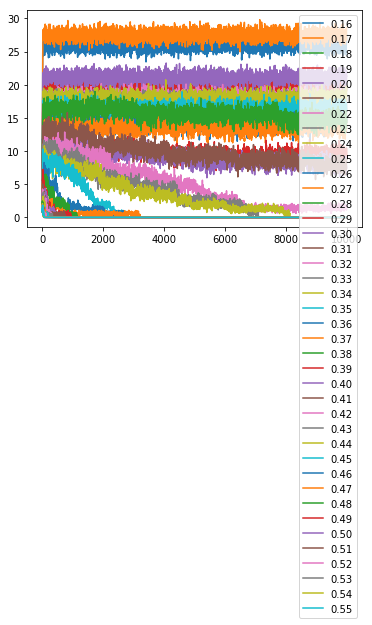

In [82]:
trans = []
for i in x:
    print i
    st = '../data/simple-test2/avg(I_t)-test.pck,N=50,dt=1,T=10000,beta=0.2,mu='+str(i)+',Q=30,res=1.txt'
    print st
    d = np.genfromtxt(st);
    plt.plot(d,label=i)
    trans.append(np.mean(d[-100:]))
    plt.legend(loc=0)
plt.show()


In [83]:
xx = np.array(map(float,x))

0.926778377349


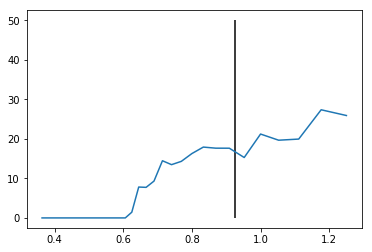

In [84]:
plt.plot(0.2/xx, trans)
print threshold_ratio(2,np.mean(act.values()), np.mean(np.array(act.values())**2))
plt.vlines(threshold_ratio(2,np.mean(act.values()), np.mean(np.array(act.values())**2)),0,N)

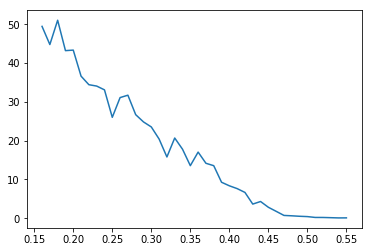

In [66]:
plt.plot(xx, trans)
